# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension --sys-prefix
!jupyter nbextension install --py widgetsnbextension --sys-prefix


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 139 kB 850 kB/s eta 0:00:01
     |████████████████████████████████| 214 kB 6.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 26.1 MB/s eta 0:00:01
Enabling notebook extension jupyter-js-widgets/extension...
Traceback (most recent call last):
  File "/opt/conda/bin/jupyter-nbextension", line 11, in <module>
    sys.exit(main())
  File "/opt/conda/lib/python3.7/site-packages/jupyter_core/application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/opt/conda/lib/python3.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.7/site-packages/notebook/nbextensions.py", line 988, in start
    super(NBExtensionApp, self).start()
  File "/opt/conda/lib/python3.7/site-packages/jupyter_core/application.py", line 259, in start
   

In [3]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 61.5 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 64.4 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.7 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 65.1 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 66.2 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 59.1 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 72.8 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 73.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 65.1 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 11.2 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 74.4 MB/s eta 0:00:01


     |████████████████████████████████| 93 kB 2.3 MB/s  eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=2555864bf581d9fcf8d3cac1be5caea787cd0e03e7176111ea1d0a5492e15601
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.
  Attempting uninstall: widg

## Imports

In [4]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [6]:
# Define transforms
transform = transforms.Compose([transforms.Resize((28, 28)), transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

# Create training set and define training dataloader
train_data = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size = 64, shuffle = True)

# making a validation set 
train_size = int(0.8 * len(train_data))
valid_size = len(train_data) - train_size

train_data, valid_data = torch.utils.data.random_split(train_data, [train_size, valid_size])

valid_loader= DataLoader(valid_data, batch_size= 64, shuffle= False)

# Create test set and define test dataloader
test_data = torchvision.datasets.MNIST(root='data', train=False, download=True, transform= transform)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?



It's the basic transform, it's what's enough for this simple dataset, i resize the images to 28*28 as needed,
i added a validation data set to optimize the model



## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [7]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

7


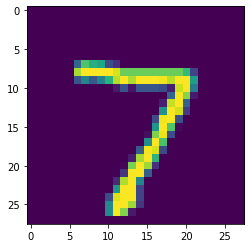

2


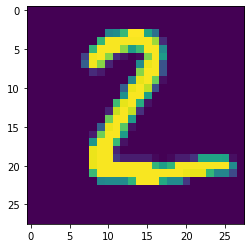

1


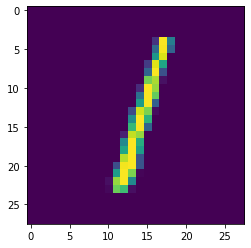

0


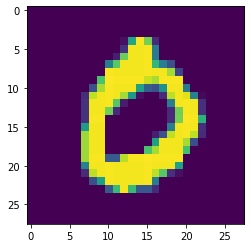

4


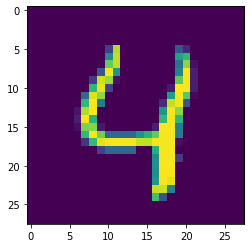

In [8]:
# Explore data
show5(test_loader)


## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [9]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model
net = Net()
net.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [10]:
optimizer = optim.SGD(net.parameters(), lr = 0.002, momentum=0.9)

criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [14]:
train_losses = [] 
valid_losses = []  
valid_accuracies = [] 
def train_fun(model, train_loader,valid_loader, criterion, optimizer, device, epochs = 20, patience = 5):
    model.to(device)
    model.train()
    best_valid_loss = float('inf')
    no_improvement = 0
    

    
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
            
        for batch_idx, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss +=loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            if batch_idx % 250 == 0:  
                print(f'Epoch [{epoch + 1}/{epochs}], Batch [{batch_idx + 1}/{len(train_loader)}], Loss: {loss.item():.6f}, Accuracy: {100 * correct / total:.2f}%')
        
                train_loss = running_loss / len(train_loader)
                train_losses.append(train_loss)
        
        
        valid_loss = 0.0
        model.eval()
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for images, labels in valid_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                valid_loss += loss.item()
                _, predicted_val = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted_val == labels).sum().item()
        
                valid_loss /= len(valid_loader)       
                valid_losses.append(valid_loss)
        
                valid_accuracy = 100 * correct_val / total_val
                valid_accuracies.append(valid_accuracy)
        print(f'Epoch [{epoch + 1}/{epochs}], Training Loss: {running_loss / len(train_loader):.6f}, Validation Loss: {valid_loss:.6f}, Validation Accuracy: {100 * correct_val / total_val:.2f}%')


        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            no_improvement = 0
        else:
            no_improvement += 1

        if no_improvement >= patience:
            print(f'Validation loss has not improved for {patience} consecutive epochs. Early stopping...')
            break

    print('Training finished.')

     
train_fun(net, train_loader,valid_loader, criterion, optimizer, device)

Epoch [1/20], Batch [1/938], Loss: 0.221166, Accuracy: 95.31%
Epoch [1/20], Batch [251/938], Loss: 0.232464, Accuracy: 94.22%
Epoch [1/20], Batch [501/938], Loss: 0.215512, Accuracy: 94.22%
Epoch [1/20], Batch [751/938], Loss: 0.161670, Accuracy: 94.32%
Epoch [1/20], Training Loss: 0.189183, Validation Loss: 0.000214, Validation Accuracy: 95.34%
Epoch [2/20], Batch [1/938], Loss: 0.088409, Accuracy: 96.88%
Epoch [2/20], Batch [251/938], Loss: 0.270606, Accuracy: 94.95%
Epoch [2/20], Batch [501/938], Loss: 0.258218, Accuracy: 95.03%
Epoch [2/20], Batch [751/938], Loss: 0.225881, Accuracy: 95.10%
Epoch [2/20], Training Loss: 0.163489, Validation Loss: 0.000137, Validation Accuracy: 95.77%
Epoch [3/20], Batch [1/938], Loss: 0.117442, Accuracy: 96.88%
Epoch [3/20], Batch [251/938], Loss: 0.121208, Accuracy: 95.69%
Epoch [3/20], Batch [501/938], Loss: 0.135270, Accuracy: 95.68%
Epoch [3/20], Batch [751/938], Loss: 0.103841, Accuracy: 95.80%
Epoch [3/20], Training Loss: 0.145315, Validation 

Plot the training loss (and validation loss/accuracy, if recorded).

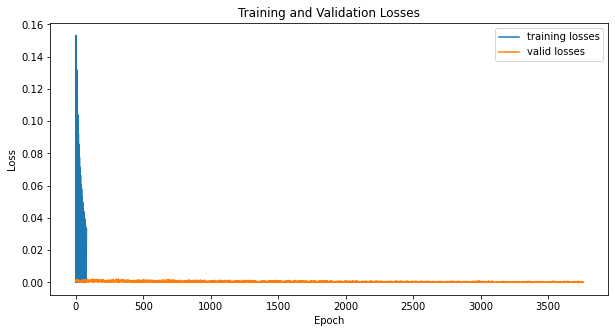

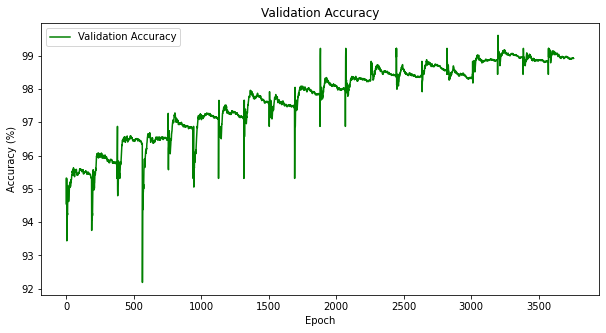

In [15]:
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='training losses')
plt.plot(valid_losses, label='valid losses')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Losses")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(valid_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy')
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [16]:
def test_accuracy(model, test_loader, device):
    model.eval()  
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1) 
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

test_accuracy(net, test_loader, device)


Test Accuracy: 97.65%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [17]:
# there's no need for improvement

## Saving your model
Using `torch.save`, save your model for future loading.

In [18]:
torch.save(net, 'model.pth')